# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! You already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this assignment, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, you must use mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of this assignment, you will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. You will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

🫵Pro-tip: Do not re-write any results so as to re-use them in later experiments for tabulation and plotting.

💭Trivia: Did you know code written using ChatGPT is easy to catch?

### Step zero: Import Libraries

In [24]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
from tqdm import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [25]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print("Train set size: ", len(trainset))
print("Test set size: ", len(testset))

Train set size:  60000
Test set size:  10000


In [26]:
trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)
# testloader = #TODO

testloader_minibatch = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)
testloader_stochastic = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)


This is the size of image data torch.Size([64, 1, 28, 28])
This is the size of labels data torch.Size([64])


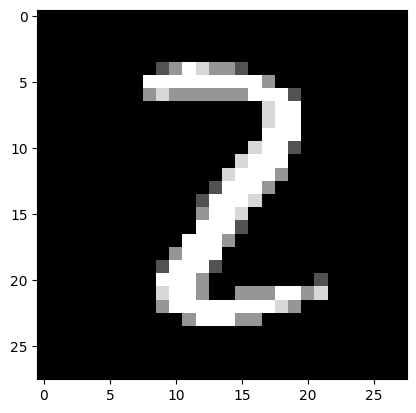

In [27]:
iter_func = iter(trainloader_minibatch)

image_data, label_data = next(iter_func)

print("This is the size of image data",image_data.shape)

print("This is the size of labels data",label_data.shape)

plt.imshow(image_data[1].numpy().squeeze(), cmap='Greys_r')

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

input_size = 784
hidden_size_1 = 128
hidden_size_2 = 64
num_classes = 10
num_epochs = 10

In [29]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size_1,hidden_size_2, num_classes):
        super(SimpleMLP,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.l3(out)
        return out
    
model = SimpleMLP(input_size,hidden_size_1,hidden_size_2,num_classes).to(device)

criterion = nn.CrossEntropyLoss()

### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [30]:
# code here

sgd_optimizer_without_momentum = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0)
sgd_optimizer_with_momentum = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
sgd_optimizer_with_l2_regularization = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0, weight_decay=0.001)
rmsprop_optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, momentum=0.9)
adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.0, amsgrad=False)

### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

In [31]:
print(model)

SimpleMLP(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (l3): Linear(in_features=64, out_features=10, bias=True)
)


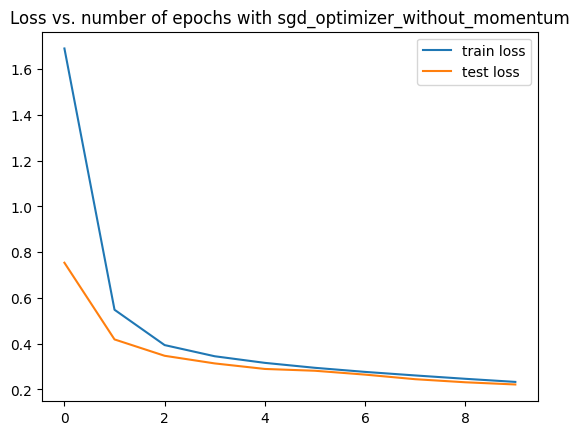

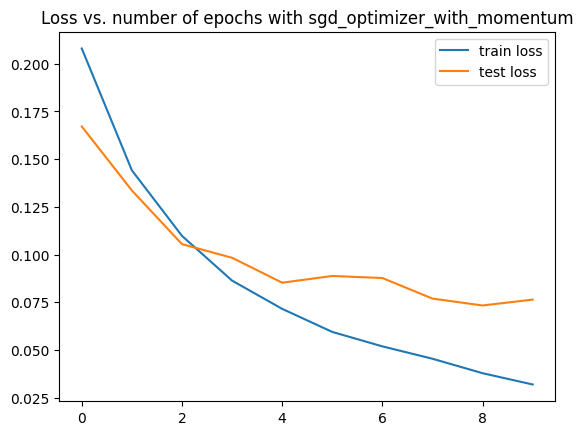

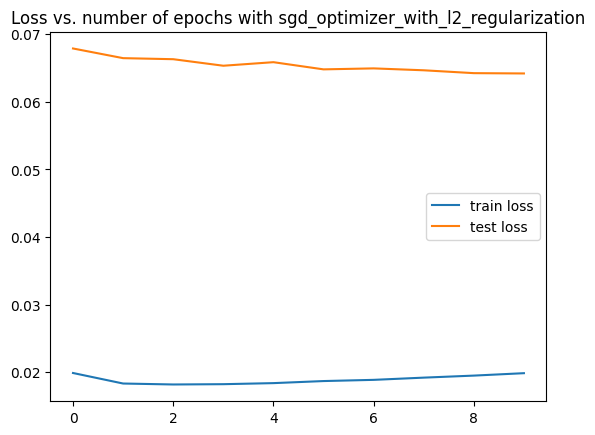

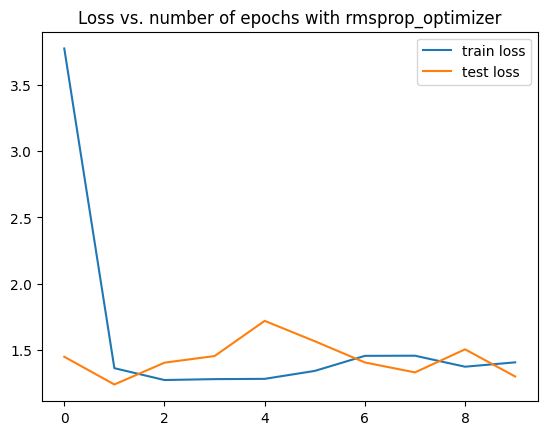

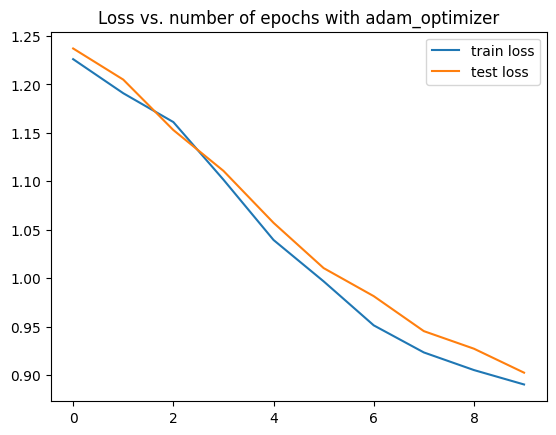

In [32]:
n_total_steps = len(trainloader_minibatch)

optimizer_list = ['sgd_optimizer_without_momentum', 'sgd_optimizer_with_momentum', 'sgd_optimizer_with_l2_regularization', 'rmsprop_optimizer', 'adam_optimizer']
optimizerindex=0

model.train()

accuracy_list = []
f1_score_list = []

for optimizer in [sgd_optimizer_without_momentum, sgd_optimizer_with_momentum, sgd_optimizer_with_l2_regularization, rmsprop_optimizer, adam_optimizer]:
    train_losses=[]
    test_losses=[]
    optimizerindex+=1
    for epoch in range(num_epochs):
        out_loss = 0
        for i, (image, labels) in enumerate(trainloader_minibatch):
            image = image.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
                
            # Forward pass
            outputs = model(image)
            loss = criterion(outputs, labels)
                
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            out_loss += loss.item()
                
            # if i == n_total_steps-1:
            #     print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

        train_loss=out_loss/len(trainloader_minibatch)
        train_losses.append(train_loss)

        with torch.no_grad():
            n_correct = 0
            n_samples = 0
            out_loss = 0
            y_pred = []
            y_true = []
            for images, labels in testloader_minibatch:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)

                loss = criterion(outputs, labels)
                out_loss += loss.item()
                                
                _, predicted = torch.max(outputs, 1)
                n_samples += labels.shape[0]
                n_correct += (predicted == labels).sum().item()
                
                y_pred.append(predicted)
                y_true.append(labels)
                            
            test_loss=out_loss/len(testloader_minibatch)
            test_losses.append(test_loss)
                            
            acc = 100.0 * n_correct / n_samples

    # print(f'Accuracy of the network on the 10000 test images: {acc} % with {optimizer_list[optimizerindex-1]}')
    accuracy_list.append(acc)
    y_pred = torch.cat(y_pred)
    y_true = torch.cat(y_true)
    f1_score_list.append(f1_score(y_true.cpu(), y_pred.cpu(), average='macro'))
    



    plt.plot(train_losses, label='train loss')
    plt.plot(test_losses, label='test loss')
    plt.title(f'Loss vs. number of epochs with {optimizer_list[optimizerindex-1]}')
    plt.legend()
    plt.show()


In [33]:
# print optimizer_list, accuracy_list, f1_score_list as a table

for i in range(len(optimizer_list)):
    print('Optimizer: {0:50} | Accuracy: {1:10.2f} | F1 Score: {2:10.2f}'.format(optimizer_list[i], accuracy_list[i], f1_score_list[i]))
    

Optimizer: sgd_optimizer_without_momentum                     | Accuracy:      93.62 | F1 Score:       0.94
Optimizer: sgd_optimizer_with_momentum                        | Accuracy:      97.73 | F1 Score:       0.98
Optimizer: sgd_optimizer_with_l2_regularization               | Accuracy:      97.87 | F1 Score:       0.98
Optimizer: rmsprop_optimizer                                  | Accuracy:      45.46 | F1 Score:       0.36
Optimizer: adam_optimizer                                     | Accuracy:      69.51 | F1 Score:       0.65


### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.

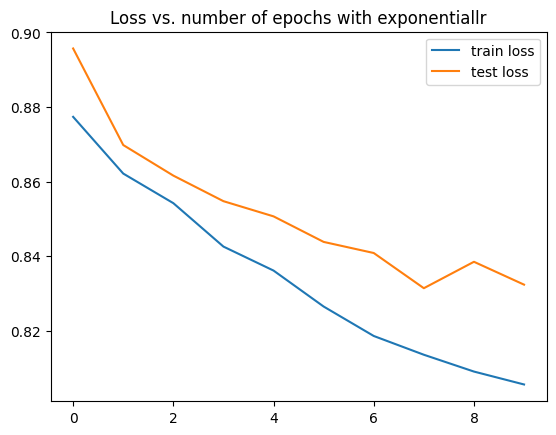

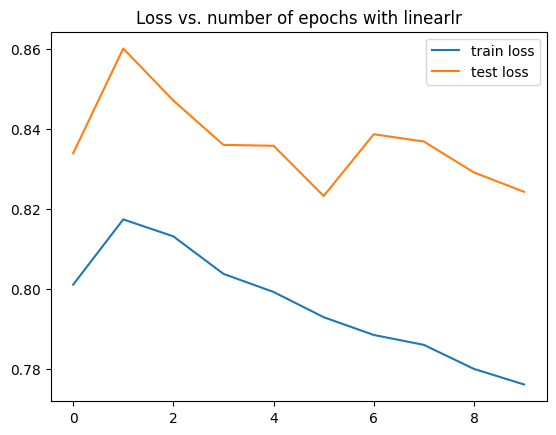

In [34]:
# code and analysis here

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
exponentiallr = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
linearlr = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.95 ** epoch)

scheduler_list = ['exponentiallr', 'linearlr']
schedulerindex=0

model.train()

accuracy_list = []
f1_score_list = []

for scheduler in [exponentiallr, linearlr]:
    train_losses=[]
    test_losses=[]
    schedulerindex+=1
    for epoch in range(num_epochs):
        out_loss = 0
        for i, (image, labels) in enumerate(trainloader_minibatch):
            image = image.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
                
            # Forward pass
            outputs = model(image)
            loss = criterion(outputs, labels)
                
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            out_loss += loss.item()
                
            # if i == n_total_steps-1:
            #     print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
        scheduler.step()
        train_loss=out_loss/len(trainloader_minibatch)
        train_losses.append(train_loss)

        with torch.no_grad():
            n_correct = 0
            n_samples = 0
            out_loss = 0
            y_pred = []
            y_true = []
            for images, labels in testloader_minibatch:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)

                loss = criterion(outputs, labels)
                out_loss += loss.item()
                                
                _, predicted = torch.max(outputs, 1)
                n_samples += labels.shape[0]
                n_correct += (predicted == labels).sum().item()
                
                y_pred.append(predicted)
                y_true.append(labels)
                            
            test_loss=out_loss/len(testloader_minibatch)
            test_losses.append(test_loss)
                            
            acc = 100.0 * n_correct / n_samples

    # print(f'Accuracy of the network on the 10000 test images: {acc} % with {optimizer_list[optimizerindex-1]}')
    accuracy_list.append(acc)
    y_pred = torch.cat(y_pred)
    y_true = torch.cat(y_true)
    f1_score_list.append(f1_score(y_true.cpu(), y_pred.cpu(), average='macro'))
    



    plt.plot(train_losses, label='train loss')
    plt.plot(test_losses, label='test loss')
    plt.title(f'Loss vs. number of epochs with {scheduler_list[schedulerindex-1]}')
    plt.legend()
    plt.show()


In [35]:
for i in range(len(scheduler_list)):
    print('Scheduler: {0:50} | Accuracy: {1:10.2f} | F1 Score: {2:10.2f}'.format(scheduler_list[i], accuracy_list[i], f1_score_list[i]))

Scheduler: exponentiallr                                      | Accuracy:      72.61 | F1 Score:       0.70
Scheduler: linearlr                                           | Accuracy:      71.98 | F1 Score:       0.69


### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

In [36]:
# code here
class BatchNormMLP(nn.Module):
    def __init__(self, input_size, hidden_size_1,hidden_size_2, num_classes):
        super(BatchNormMLP,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.bn1 = nn.InstanceNorm1d(hidden_size_1)
        self.l2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.InstanceNorm1d(hidden_size_2)
        self.l3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.bn1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.bn2(out)
        out = self.l3(out)
        return out
    
model_batchnorm = BatchNormMLP(input_size,hidden_size_1,hidden_size_2,num_classes).to(device)

criterion = nn.CrossEntropyLoss()

In [37]:
class DropoutMLP(nn.Module):
    def __init__(self, input_size, hidden_size_1,hidden_size_2, num_classes):
        super(DropoutMLP,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.d1 = nn.Dropout(p=0.2)
        self.l2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.d2 = nn.Dropout(p=0.2)
        self.l3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.d1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.d2(out)
        out = self.l3(out)
        return out
    
model_dropout = DropoutMLP(input_size,hidden_size_1,hidden_size_2,num_classes).to(device)

In [38]:
class BatchNormDropoutMLP(nn.Module):
    def __init__(self, input_size, hidden_size_1,hidden_size_2, num_classes):
        super(BatchNormDropoutMLP,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.bn1 = nn.InstanceNorm1d(hidden_size_1)
        self.d1 = nn.Dropout(p=0.2)
        self.l2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.InstanceNorm1d(hidden_size_2)
        self.d2 = nn.Dropout(p=0.2)
        self.l3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.bn1(out)
        out = self.d1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.bn2(out)
        out = self.d2(out)
        out = self.l3(out)
        return out
    
model_batch_drop = BatchNormDropoutMLP(input_size,hidden_size_1,hidden_size_2,num_classes).to(device)

### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

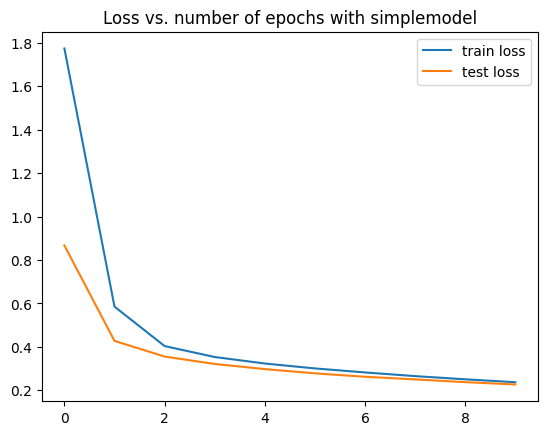

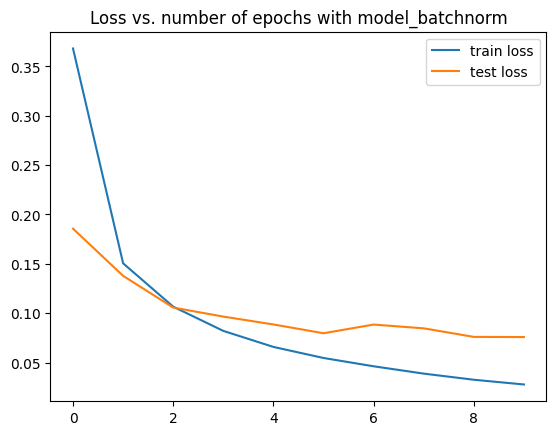

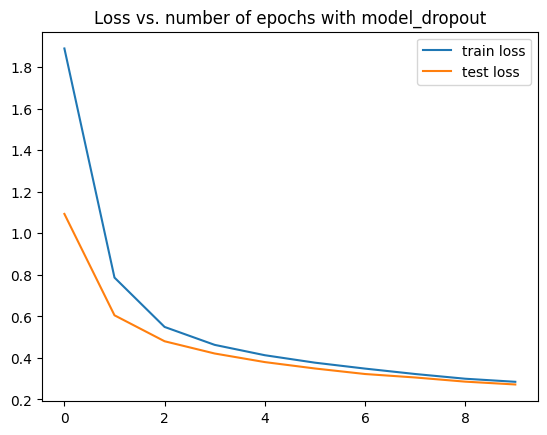

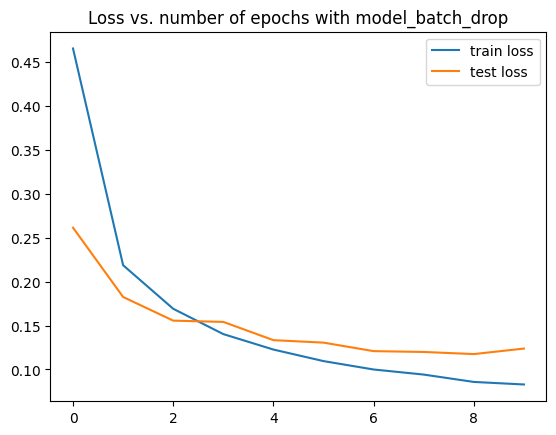

In [39]:
n_total_steps = len(trainloader_minibatch)

# model.train()

accuracy_list = []
f1_score_list = []

simplemodel=SimpleMLP(input_size,hidden_size_1,hidden_size_2,num_classes).to(device)

model_list = ['simplemodel', 'model_batchnorm', 'model_dropout', 'model_batch_drop']
modelindex = 0


for model in [simplemodel, model_batchnorm, model_dropout, model_batch_drop]:

    model.train()

    sgd_optimizer_with_l2_regularization = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0, weight_decay=0.001)

    optimizer = sgd_optimizer_with_l2_regularization

    train_losses=[]
    test_losses=[]
    modelindex+=1
    for epoch in range(num_epochs):
        out_loss = 0
        for i, (image, labels) in enumerate(trainloader_minibatch):
            image = image.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
                
            # Forward pass
            outputs = model(image)
            loss = criterion(outputs, labels)
                
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            out_loss += loss.item()
                
            # if i == n_total_steps-1:
            #     print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

        train_loss=out_loss/len(trainloader_minibatch)
        train_losses.append(train_loss)

        with torch.no_grad():
            n_correct = 0
            n_samples = 0
            out_loss = 0
            y_pred = []
            y_true = []
            for images, labels in testloader_minibatch:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)

                loss = criterion(outputs, labels)
                out_loss += loss.item()
                                
                _, predicted = torch.max(outputs, 1)
                n_samples += labels.shape[0]
                n_correct += (predicted == labels).sum().item()
                
                y_pred.append(predicted)
                y_true.append(labels)
                            
            test_loss=out_loss/len(testloader_minibatch)
            test_losses.append(test_loss)
                            
            acc = 100.0 * n_correct / n_samples

    # print(f'Accuracy of the network on the 10000 test images: {acc} % with {optimizer_list[optimizerindex-1]}')
    accuracy_list.append(acc)
    y_pred = torch.cat(y_pred)
    y_true = torch.cat(y_true)
    f1_score_list.append(f1_score(y_true.cpu(), y_pred.cpu(), average='macro'))




    plt.plot(train_losses, label='train loss')
    plt.plot(test_losses, label='test loss')
    plt.title(f'Loss vs. number of epochs with {model_list[modelindex-1]}')
    plt.legend()
    plt.show()

In [40]:
print("Using sgd_optimizer_with_l2_regularization")
for i in range(len(model_list)):
    print('Model: {0:50} | Accuracy: {1:10.2f} | F1 Score: {2:10.2f}'.format(model_list[i], accuracy_list[i], f1_score_list[i]))

Using sgd_optimizer_with_l2_regularization
Model: simplemodel                                        | Accuracy:      93.35 | F1 Score:       0.93
Model: model_batchnorm                                    | Accuracy:      97.69 | F1 Score:       0.98
Model: model_dropout                                      | Accuracy:      92.02 | F1 Score:       0.92
Model: model_batch_drop                                   | Accuracy:      96.51 | F1 Score:       0.96


### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

#### Mini batch

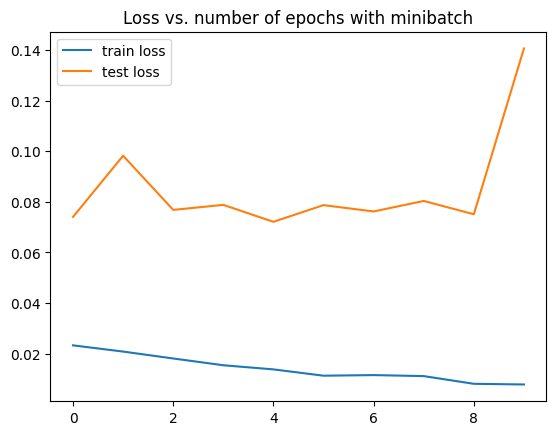

In [43]:
# code here
n_total_steps = len(trainloader_minibatch)

# model.train()

accuracy_list = []
f1_score_list = []

model=model_batchnorm

model.train()

sgd_optimizer_with_l2_regularization = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0, weight_decay=0.001)

optimizer = sgd_optimizer_with_l2_regularization

train_losses=[]
test_losses=[]

for epoch in range(num_epochs):
    out_loss = 0
    for i, (image, labels) in enumerate(trainloader_minibatch):
        image = image.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
            
        # Forward pass
        outputs = model(image)
        loss = criterion(outputs, labels)
            
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        out_loss += loss.item()
            
        # if i == n_total_steps-1:
        #     print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

    train_loss=out_loss/len(trainloader_minibatch)
    train_losses.append(train_loss)

    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        out_loss = 0
        y_pred = []
        y_true = []
        for images, labels in testloader_minibatch:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)

            loss = criterion(outputs, labels)
            out_loss += loss.item()
                            
            _, predicted = torch.max(outputs, 1)
            n_samples += labels.shape[0]
            n_correct += (predicted == labels).sum().item()
            
            y_pred.append(predicted)
            y_true.append(labels)
                        
        test_loss=out_loss/len(testloader_minibatch)
        test_losses.append(test_loss)
                        
        acc = 100.0 * n_correct / n_samples

# print(f'Accuracy of the network on the 10000 test images: {acc} % with {optimizer_list[optimizerindex-1]}')
accuracy_list.append(acc)
y_pred = torch.cat(y_pred)
y_true = torch.cat(y_true)
f1_score_list.append(f1_score(y_true.cpu(), y_pred.cpu(), average='macro'))




plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.title(f'Loss vs. number of epochs with minibatch')
plt.legend()
plt.show()

#### Stochastic

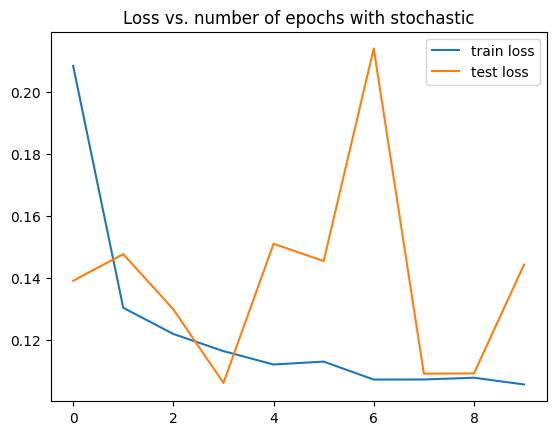

In [44]:
model=model_batchnorm

model.train()

sgd_optimizer_with_l2_regularization = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0, weight_decay=0.001)

optimizer = sgd_optimizer_with_l2_regularization

train_losses=[]
test_losses=[]

for epoch in range(num_epochs):
    out_loss = 0
    for i, (image, labels) in enumerate(trainloader_stochastic):
        image = image.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
            
        # Forward pass
        outputs = model(image)
        loss = criterion(outputs, labels)
            
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        out_loss += loss.item()
            
        # if i == n_total_steps-1:
        #     print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

    train_loss=out_loss/len(trainloader_stochastic)
    train_losses.append(train_loss)

    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        out_loss = 0
        y_pred = []
        y_true = []
        for images, labels in testloader_minibatch:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)

            loss = criterion(outputs, labels)
            out_loss += loss.item()
                            
            _, predicted = torch.max(outputs, 1)
            n_samples += labels.shape[0]
            n_correct += (predicted == labels).sum().item()
            
            y_pred.append(predicted)
            y_true.append(labels)
                        
        test_loss=out_loss/len(testloader_minibatch)
        test_losses.append(test_loss)
                        
        acc = 100.0 * n_correct / n_samples

# print(f'Accuracy of the network on the 10000 test images: {acc} % with {optimizer_list[optimizerindex-1]}')
accuracy_list.append(acc)
y_pred = torch.cat(y_pred)
y_true = torch.cat(y_true)
f1_score_list.append(f1_score(y_true.cpu(), y_pred.cpu(), average='macro'))




plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.title(f'Loss vs. number of epochs with stochastic')
plt.legend()
plt.show()

In [46]:
print("Using sgd_optimizer_with_l2_regularization without batch normalization")
model_list = ['Minibatch', 'Stochastic']
for i in range(2):
    print('Model: {0:50} | Accuracy: {1:10.2f} | F1 Score: {2:10.2f}'.format(model_list[i], accuracy_list[i], f1_score_list[i]))

Using sgd_optimizer_with_l2_regularization without batch normalization
Model: Minibatch                                          | Accuracy:      96.11 | F1 Score:       0.96
Model: Stochastic                                         | Accuracy:      95.43 | F1 Score:       0.95


### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

---
## When using different optimizers, we obtain the results as follows:


- Optimizer: sgd_optimizer_without_momentum

    - Accuracy:      93.62 
    - F1 Score:       0.94
<br><br><br>

- Optimizer: sgd_optimizer_with_momentum   

    - Accuracy:      97.73
    - F1 Score:       0.98
<br><br><br>

- Optimizer: sgd_optimizer_with_l2_regularization

    - Accuracy:      97.87 
    - F1 Score:       0.98
<br><br><br>

- Optimizer: rmsprop_optimizer        

    - Accuracy:      45.46 
    - F1 Score:       0.36
<br><br><br>

- Optimizer: adam_optimizer    

    - Accuracy:      69.51 
    - F1 Score:       0.65

`We notice that SGD performs better than Adam. This is because SGD is likelier to converge at the minima and has better overall performance for image classification.`

---

---

## When using different optimizers, we obtain the results as follows:

- Scheduler: exponentiallr                                      
    - Accuracy:      72.61 
    - F1 Score:       0.70

<br><br><br>
- Scheduler: linearlr                                           
    - Accuracy:      71.98 
    - F1 Score:       0.69


`We notice that LR Scheduling improves the accuracy of the Adam optimizer when training and testing(As compared to Adam without any LR Scheduler ). While linear LR decays the learning rate linearly, exponential LR decays the learning rate by a multiplicative factor`

---

---
## When using sgd with l2 regularization, we obtain the results as follows:

- Model: simplemodel                                        
    - Accuracy:      93.35 
    - F1 Score:       0.93

<br><br><br>
- Model: model_batchnorm                                    
    - Accuracy:      97.69 
    - F1 Score:       0.98

<br><br><br>
- Model: model_dropout                                      
    - Accuracy:      92.02 
    - F1 Score:       0.92

<br><br><br>
- Model: model_batch_drop                                   
    - Accuracy:      96.51
    - F1 Score:       0.96


`We notice that BatchNorm and Dropout both improve the performance of the model. BatchNorm normalizes the input to the activation function, which helps in faster convergence. Dropout randomly drops some neurons in the network, which helps in preventing overfitting.`

---

## When using sgd with l2 regularization and comparing minibatch vs stochastic (Model with batchnorm only), we obtain the results as follows:

- Model: Minibatch                                          
    - Accuracy:      96.11 
    - F1 Score:       0.96

<br><br><br>
- Model: Stochastic                                         
    - Accuracy:      95.43 
    - F1 Score:       0.95


`We notice that the minibatch model performs better than the stochastic model. This is because the minibatch model is able to train on a larger number of samples, which helps in better generalization.`

---